# Set up

In [2]:
# update path with data dir
import sys
sys.path.append('../data/')

In [60]:
import player_data as player
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from numpy import linspace

# Get data

In [4]:
file_name = 'csvs/element_gameweek_' + datetime.today().strftime('%Y-%m-%d') + '.csv'

In [5]:
try:
    element_gameweek_df = pd.read_csv(file_name)
except:
    element_gameweek_df = player.get_element_gameweek_df()
    element_gameweek_df.to_csv(file_name)

In [6]:
current_event = 26
element_types = [2, 3, 4]
threshold_minutes = 1

In [7]:
element_gameweek_df =\
element_gameweek_df[
    (element_gameweek_df['event'] <= current_event)
    & (element_gameweek_df['element_type'].isin(element_types))
    & (element_gameweek_df['minutes'] >= threshold_minutes)
]

# Distribution of goals for full matches

## Overall

In [18]:
full_matches_df = element_gameweek_df.copy()
full_matches_df=\
full_matches_df.copy()[
    (full_matches_df['minutes'] >= 85)
]

In [19]:
full_matches_df['goals_scored'].describe()

count    3952.000000
mean        0.122470
std         0.368572
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: goals_scored, dtype: float64

In [62]:
full_matches_mean = full_matches_df['goals_scored'].mean()
full_matches_std = full_matches_df['goals_scored'].std()
full_matches_min = full_matches_df['goals_scored'].min()
full_matches_max = full_matches_df['goals_scored'].max()
full_matches_mean, full_matches_std, full_matches_min, full_matches_max

(0.12246963562753037, 0.36857194515291436, 0, 3)

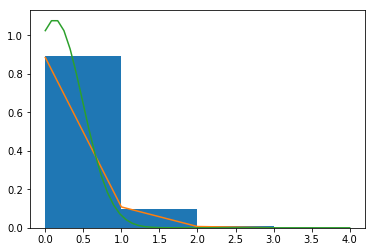

In [63]:
plt.figure()
plt.hist(full_matches_df['goals_scored'], bins=range(full_matches_min, full_matches_max+2), density=True)
plt.plot(range(full_matches_min, full_matches_max+1),
         poisson.pmf(range(full_matches_min, full_matches_max+1), full_matches_mean))
plt.plot(linspace(full_matches_min, full_matches_max+1),
         norm.pdf(linspace(full_matches_min, full_matches_max+1), full_matches_mean, full_matches_std))
plt.show()

## By element type

### Defender

In [23]:
full_matches_def_df = element_gameweek_df.copy()
full_matches_def_df=\
full_matches_def_df.copy()[
    (full_matches_def_df['minutes'] >= 85)
    & (full_matches_def_df['element_type'] == 2)
]

In [24]:
full_matches_def_df['goals_scored'].describe()

count    2000.000000
mean        0.046000
std         0.214259
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: goals_scored, dtype: float64

In [25]:
full_matches_def_mean = full_matches_def_df['goals_scored'].mean()
full_matches_def_min = full_matches_def_df['goals_scored'].min()
full_matches_def_max = full_matches_def_df['goals_scored'].max()
full_matches_def_mean, full_matches_def_min, full_matches_def_max

(0.046, 0, 2)

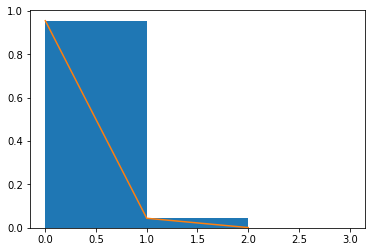

In [26]:
plt.figure()
plt.hist(full_matches_def_df['goals_scored'], bins=range(full_matches_def_min, full_matches_def_max+2), density=True)
plt.plot(range(full_matches_def_min, full_matches_def_max+1),
         poisson.pmf(range(full_matches_def_min, full_matches_def_max+1), full_matches_def_mean))
plt.show()

### Midfielder

In [30]:
full_matches_mid_df = element_gameweek_df.copy()
full_matches_mid_df=\
full_matches_mid_df.copy()[
    (full_matches_mid_df['minutes'] >= 85)
    & (full_matches_mid_df['element_type'] == 3)
]

In [31]:
full_matches_mid_df['goals_scored'].describe()

count    1582.000000
mean        0.158028
std         0.410560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: goals_scored, dtype: float64

In [32]:
full_matches_mid_mean = full_matches_mid_df['goals_scored'].mean()
full_matches_mid_min = full_matches_mid_df['goals_scored'].min()
full_matches_mid_max = full_matches_mid_df['goals_scored'].max()
full_matches_mid_mean, full_matches_mid_min, full_matches_mid_max

(0.15802781289506954, 0, 3)

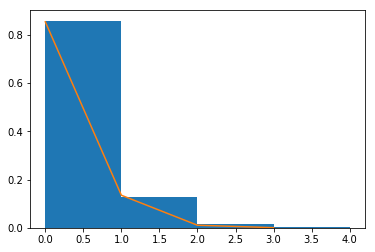

In [33]:
plt.figure()
plt.hist(full_matches_mid_df['goals_scored'], bins=range(full_matches_mid_min, full_matches_mid_max+2), density=True)
plt.plot(range(full_matches_mid_min, full_matches_mid_max+1),
         poisson.pmf(range(full_matches_mid_min, full_matches_mid_max+1), full_matches_mid_mean))
plt.show()

### Striker

In [34]:
full_matches_str_df = element_gameweek_df.copy()
full_matches_str_df=\
full_matches_str_df.copy()[
    (full_matches_str_df['minutes'] >= 85)
    & (full_matches_str_df['element_type'] == 4)
]

In [35]:
full_matches_str_df['goals_scored'].describe()

count    370.000000
mean       0.383784
std        0.614863
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: goals_scored, dtype: float64

In [36]:
full_matches_str_mean = full_matches_str_df['goals_scored'].mean()
full_matches_str_min = full_matches_str_df['goals_scored'].min()
full_matches_str_max = full_matches_str_df['goals_scored'].max()
full_matches_str_mean, full_matches_str_min, full_matches_str_max

(0.3837837837837838, 0, 3)

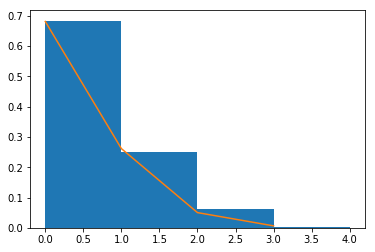

In [37]:
plt.figure()
plt.hist(full_matches_str_df['goals_scored'], bins=range(full_matches_str_min, full_matches_str_max+2), density=True)
plt.plot(range(full_matches_str_min, full_matches_str_max+1),
         poisson.pmf(range(full_matches_str_min, full_matches_str_max+1), full_matches_str_mean))
plt.show()